<a href="https://colab.research.google.com/github/Cnosimaj/PlantDiseaseDetection/blob/main/DiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.11.12


In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

TensorFow Version

In [ ]:
print("Version: ",tf.__version__)

Version:  2.18.0


In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

Downloads Plant Village Dataset

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0


In [ ]:
!ls

drive			  sample_data		    test_peach_healthy.jpg
kaggle.json		  test_apple_scab.jpg
plantvillage-dataset.zip  test_grape_black_rot.jpg


In [ ]:
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
   zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'grayscale', 'color']
38
['Tomato___Tomato_mosaic_virus', 'Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Common_rust_', 'Tomato___healthy']
38
['Tomato___Tomato_mosaic_virus', 'Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Common_rust_', 'Tomato___healthy']
38
['Tomato___Tomato_mosaic_virus', 'Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Common_rust_', 'Tomato___healthy']


Dataset

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['1c3b3f51-d8c9-4bc5-899c-dd50e107f074___Mt.N.V_HL 6027.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '44906155-2446-487e-8531-6c0d98e751dc___Mt.N.V_HL 8992.JPG', 'feb2cf1a-1903-4fb8-bc99-4b399346fef0___Mt.N.V_HL 6135.JPG', 'ac753212-e6d7-44b9-9722-4413a7418ab3___Mt.N.V_HL 6178.JPG']


In [ ]:
base_dir = 'plantvillage dataset/color'

Visualize the Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
(256, 256, 3) Class: Strawberry___healthy


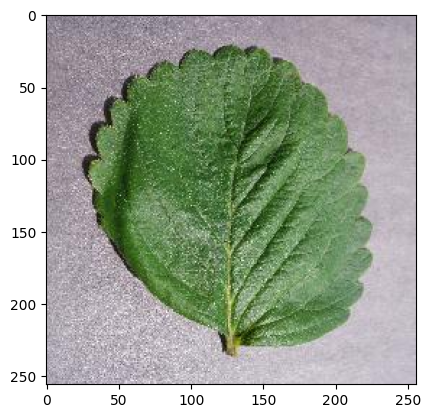

In [ ]:
image_path = '/content/plantvillage dataset/color/Strawberry___healthy/00166615-5e7b-4318-8957-5e50df335ee8___RS_HL 1785.JPG'

img = mpimg.imread(image_path)
prediction = predict_image_class(model, image_path, class_indices)
print(img.shape,'Class:',os.path.basename(os.path.dirname(image_path)))

plt.imshow(img)
plt.axis('on')
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Strawberry___healthy/00166615-5e7b-4318-8957-5e50df335ee8___RS_HL 1785.JPG'

img = mpimg.imread(image_path)

print(img)

[[[143 135 148]
  [155 147 160]
  [123 115 128]
  ...
  [163 155 168]
  [169 161 174]
  [174 166 179]]

 [[139 131 144]
  [149 141 154]
  [144 136 149]
  ...
  [165 157 170]
  [169 161 174]
  [173 165 178]]

 [[135 127 140]
  [138 130 143]
  [144 136 149]
  ...
  [166 158 171]
  [167 159 172]
  [169 161 174]]

 ...

 [[154 148 160]
  [180 174 186]
  [161 155 167]
  ...
  [195 189 201]
  [194 188 200]
  [193 187 199]]

 [[170 164 176]
  [169 163 175]
  [168 162 174]
  ...
  [193 187 199]
  [193 187 199]
  [192 186 198]]

 [[184 178 190]
  [176 170 182]
  [184 178 190]
  ...
  [196 190 202]
  [197 191 203]
  [198 192 204]]]


In [ ]:
img_size = 224
batch_size = 32

In [ ]:
data_gen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2
)

In [ ]:
train_generator = data_gen.flow_from_directory(
    directory=base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator = data_gen.flow_from_directory(
    directory=base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 10849 images belonging to 38 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Train Model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 111s 78ms/step - accuracy: 0.6057 - loss: 1.6170 - val_accuracy: 0.8643 - val_loss: 0.4365
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 126s 70ms/step - accuracy: 0.9227 - loss: 0.2503 - val_accuracy: 0.8642 - val_loss: 0.4378
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 153s 77ms/step - accuracy: 0.9677 - loss: 0.1006 - val_accuracy: 0.8909 - val_loss: 0.3922
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 98s 72ms/step - accuracy: 0.9795 - loss: 0.0682 - val_accuracy: 0.8715 - val_loss: 0.4977
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 149s 78ms/step - accuracy: 0.9808 - loss: 0.0590 - val_accuracy: 0.8779 - val_loss: 0.5422


Model Evaluation

In [ ]:
print("Evaluating model...")
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Acc: {val_acc * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8813 - loss: 0.5527
Validation Acc: 87.79%


Checking Performance

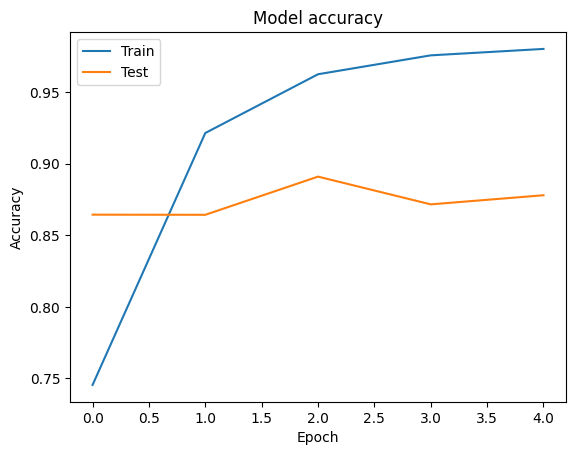

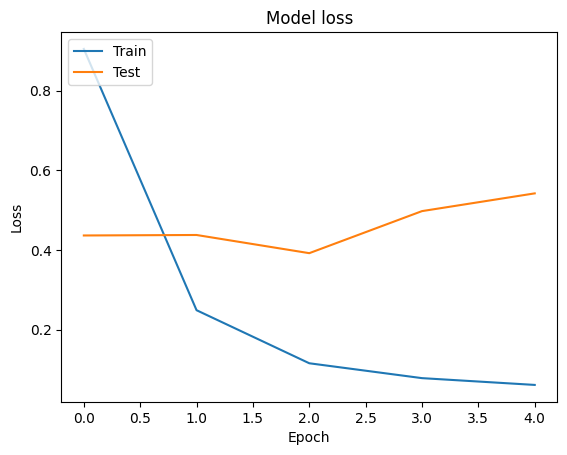

In [ ]:
# Training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Predictive System

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Rescaling the image
    img_array = img_array.astype('float32') / 255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

Random Test Samples from Dataset

SOURCE: class: Corn_(maize)___Northern_Leaf_Blight, file: Corn_(maize)___Northern_Leaf_Blight/2405c6b8-97e3-4223-bd26-b43f7db3e167___RS_NLB 3933.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
PREDICTED: class: Corn_(maize)___Northern_Leaf_Blight


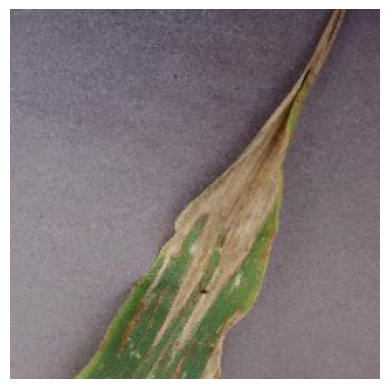

SOURCE: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, file: Tomato___Tomato_Yellow_Leaf_Curl_Virus/2970df15-12d6-4ca2-b445-78a7b2cdba0a___UF.GRC_YLCV_Lab 09465.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
PREDICTED: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus


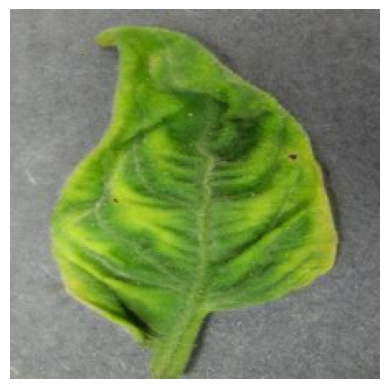

In [ ]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 2)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))

    image_path = os.path.join(base_dir, filename)
    img = load_and_preprocess_image(image_path)
    img = img.squeeze()

    prediction = predict_image_class(model, image_path, class_indices)
    print("PREDICTED: class: %s" % (prediction)) # Print predicted class
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

Saving as a json file

In [ ]:
json.dump(class_indices, open("class_indices.json", "w"))

In [ ]:
#image_path = '/content/test_apple_scab.jpg'
#image_path = '/content/test_grape_black_rot.jpg'
#image_path = '/content/test_peach_healthy.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)
# Output

print("Predicted class: ", {predicted_class_name})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class:  {'Tomato___Tomato_Yellow_Leaf_Curl_Virus'}
